In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv('all_school_data_2019_2023.csv', sep=",", header=0)
grades = ['3','4','5','6','7','8']
years = ['2019', '2021', '2022', '2023']

## Top level Notes:
1. If a school has fewer than 16 valid scores, they are not required to report their findings. Therefore, the averages that are used actually do not correspond to true averages, as they negate scores from [2787, 2998, 2845, 2797] numbers of schools.
2. One such school has a per student spend of nearly $50k in 2023 (https://www.cde.state.co.us/schoolview/financialtransparency/historical/1020/9804)
3. Apparently Cherry Creek Elevation is an online school. They reportedly only served 133 students in 2020, but [wrote articles](https://www.cherrycreekschools.org/site/default.aspx?PageType=3&DomainID=4&ModuleInstanceID=85&ViewID=6446EE88-D30C-497E-9316-3F8874B3E108&RenderLoc=0&FlexDataID=34147&PageID=1) saying they served over 10000. This is a total lie.

Text(0.5, 1.0, 'No Score Totals by Year For Grades 4, 6, and 8')

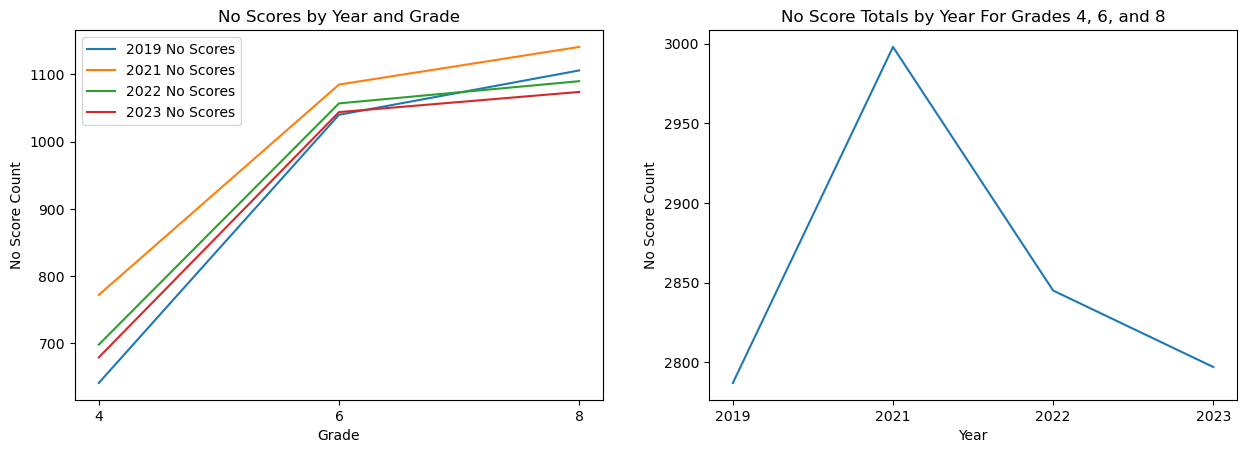

In [2]:
## Number of schools not required to submit scores. Using grades 4, 6, and 8 because those all have reporting since 2019
noScores_Grade4 = []
noScores_Grade6 = []
noScores_Grade8 = []

# import numpy as np
# values = np.array([1,2,3,1,2,4,5,6,3,2,1])
# searchval = 3
# ii = np.where(values == searchval)[0]
subGrades = ['4', '6', '8']
for year in years:
    for grade in subGrades:
        allScores = np.array(data[year+' Grade '+grade+' meets or exceeds expectations'].tolist())
        noScoreCount = len(np.where(np.isnan(allScores))[0])
        if grade == '4':
            noScores_Grade4.append(noScoreCount)
        if grade == '6':
            noScores_Grade6.append(noScoreCount)
        if grade == '8':
            noScores_Grade8.append(noScoreCount)
            
totals = [sum([noScores_Grade4[0], noScores_Grade6[0], noScores_Grade8[0]]), sum([noScores_Grade4[1], noScores_Grade6[1], noScores_Grade8[1]]), sum([noScores_Grade4[2], noScores_Grade6[2], noScores_Grade8[2]]), sum([noScores_Grade4[3], noScores_Grade6[3], noScores_Grade8[3]])]
            
fig, ((ax1, ax2)) = plt.subplots(1, 2)

fig.subplots_adjust(wspace=0.2, hspace=0)
# fig.set_figheight(15)
fig.set_figwidth(15)

ax1.plot(subGrades, [noScores_Grade4[0], noScores_Grade6[0], noScores_Grade8[0]], label="2019 No Scores")
ax1.plot(subGrades, [noScores_Grade4[1], noScores_Grade6[1], noScores_Grade8[1]], label="2021 No Scores")
ax1.plot(subGrades, [noScores_Grade4[2], noScores_Grade6[2], noScores_Grade8[2]], label="2022 No Scores")
ax1.plot(subGrades, [noScores_Grade4[3], noScores_Grade6[3], noScores_Grade8[3]], label="2023 No Scores")
ax1.set_xlabel('Grade')
ax1.set_ylabel('No Score Count')
ax1.legend(loc="best")
ax1.set_title('No Scores by Year and Grade')

ax2.plot(
    years,
    totals,
    label="Total No Scores")
ax2.set_xlabel('Year')
ax2.set_ylabel('No Score Count')
ax2.set_title('No Score Totals by Year For Grades 4, 6, and 8')

Text(0.5, 1.0, 'Mean Scale Scores')

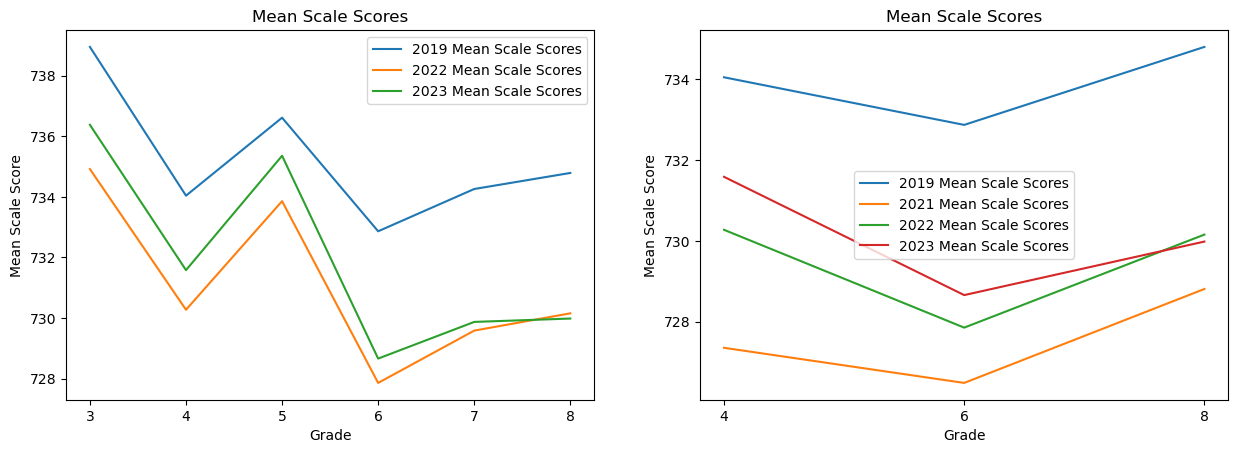

In [3]:
## First, lets check the average scores per year for each grade, and the average performance.
# Generate the average scores
def getMeanScaleScores(data, grades, years):
    meanScaleScores = []
    for year in years:
        for grade in grades:
            ## Here, remove the N/As and the 0.0, because they totally skew the results
            meanScaleScores.append(data[(data[year+' Grade '+grade+' Mean Scale Score'].notnull()) & (data[year+' Grade '+grade+' Mean Scale Score'] != 0.0)][year+' Grade '+grade+' Mean Scale Score'].mean())
    # Order is year, grade as in 2019 - 3, 2019-4, etc
    return meanScaleScores

# Remove nans
meanScaleScores = np.nan_to_num(np.array(getMeanScaleScores(data, grades, years)))

fig, ((ax1, ax2)) = plt.subplots(1, 2)

fig.subplots_adjust(wspace=0.2, hspace=0)
# fig.set_figheight(15)
fig.set_figwidth(15)

# Showing only 2019, 2022, and 2023
ax1.plot(grades, meanScaleScores[0:6], label="2019 Mean Scale Scores")
ax1.plot(grades, meanScaleScores[12:18], label="2022 Mean Scale Scores")
ax1.plot(grades, meanScaleScores[18:], label="2023 Mean Scale Scores")
ax1.set_xlabel('Grade')
ax1.set_ylabel('Mean Scale Score')
ax1.legend(loc="upper right")
ax1.set_title('Mean Scale Scores')

meanScaleScoresAmended = meanScaleScores[1::2]

# Remove grades 3, 5, 7 and show for years 2019, 2021, 2022, 2023
ax2.plot(['4','6','8'], meanScaleScoresAmended[0:3], label="2019 Mean Scale Scores")
ax2.plot(['4','6','8'], meanScaleScoresAmended[3:6], label="2021 Mean Scale Scores")
ax2.plot(['4','6','8'], meanScaleScoresAmended[6:9], label="2022 Mean Scale Scores")
ax2.plot(['4','6','8'], meanScaleScoresAmended[9:], label="2023 Mean Scale Scores")
ax2.set_xlabel('Grade')
ax2.set_ylabel('Mean Scale Score')
ax2.legend(loc="best")
ax2.set_title('Mean Scale Scores')

Text(0.5, 1.0, 'Average Spend Per School')

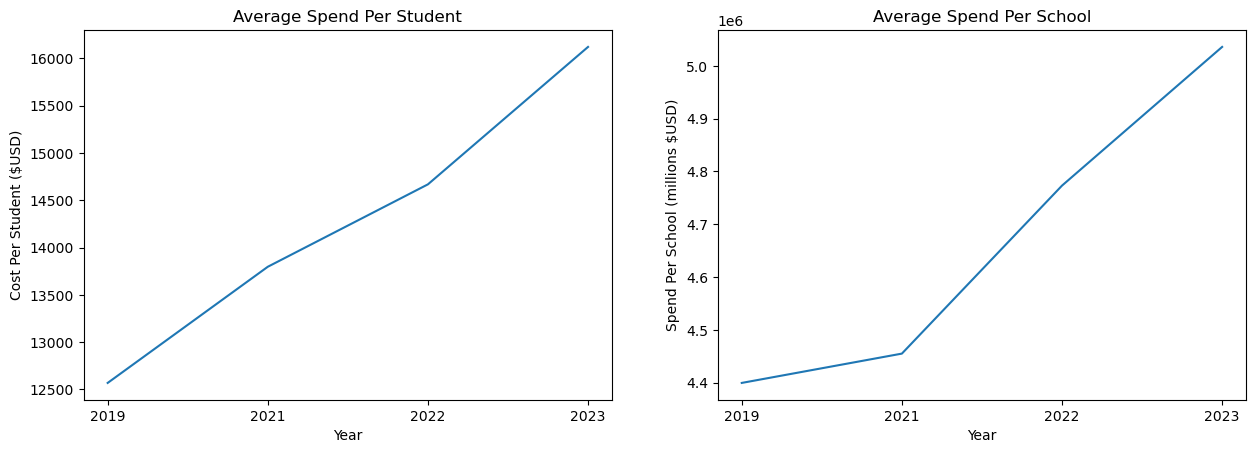

In [4]:
## Now, lets look at the spend per student over the past 4 years
# Generate the average spend per student
def getMeanSpendPerStudent(data, years):
    meanSpendPerStudent = []
    for year in years:
        meanSpendPerStudent.append(data[(data[year+' Spend Per Student'] != 'N/A') & (data[year+' Spend Per Student'] != 0.0)][year+' Spend Per Student'].mean())
    # Order is year, spendPerStudent
    return meanSpendPerStudent

def getMeanSpendPerSchool(data, years):
    meanSpendPerSchool = []
    for year in years:
        meanSpendPerSchool.append(data[(data[year+' Total Budget'] != 'N/A') & (data[year+' Total Budget'] != 0.0)][year+' Total Budget'].mean())
    # Order is year, spendPerStudent
    return meanSpendPerSchool

fig, ((ax1, ax2)) = plt.subplots(1, 2)

fig.subplots_adjust(wspace=0.2, hspace=0)
# fig.set_figheight(15)
fig.set_figwidth(15)

# Showing only 2019, 2022, and 2023
ax1.plot(years, getMeanSpendPerStudent(data, years))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cost Per Student ($USD)')
ax1.set_title('Average Spend Per Student')

# Remove grades 3, 5, 7 and show for years 2019, 2021, 2022, 2023
ax2.plot(years, getMeanSpendPerSchool(data, years))
ax2.set_xlabel('Year')
ax2.set_ylabel('Spend Per School (millions $USD)')
ax2.set_title('Average Spend Per School')

Text(0.5, 1.0, 'Average Meets/Exceeds Expectations % By Grade')

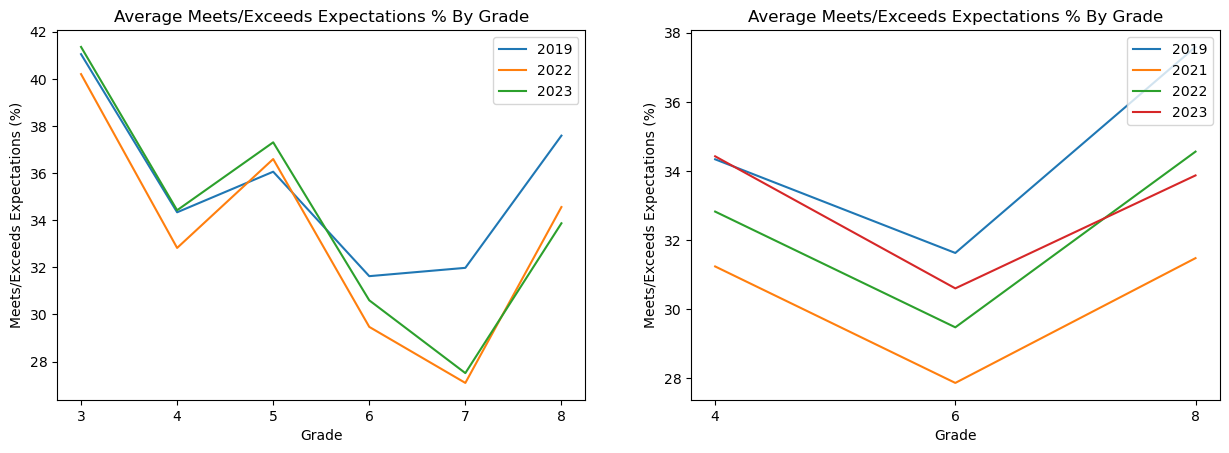

In [5]:
## Now let's plot the meets/exceeds expectations percentage for each grade (average)
# Generate the average meets/exceeds percentages
def getMeanMeetsOrExceeds(data, grades, years):
    meanMeetsOrExceeds = []
    for year in years:
        for grade in grades:
            # Don't remove 0.0 scores, because some schools actually did report values of 0
            meanMeetsOrExceeds.append(data[(data[year+' Grade '+grade+' meets or exceeds expectations'] != 'N/A')][year+' Grade '+grade+' meets or exceeds expectations'].mean())
    # Order is year, grade as in 2019 - 3, 2019-4, etc
    return meanMeetsOrExceeds

# Remove nans
meanMeetsOrExceeds = np.nan_to_num(np.array(getMeanMeetsOrExceeds(data, grades, years)))

fig, ((ax1, ax2)) = plt.subplots(1, 2)

fig.subplots_adjust(wspace=0.2, hspace=0)
fig.set_figwidth(15)

# Showing only 2019, 2022, and 2023
ax1.plot(grades, meanMeetsOrExceeds[0:6], label="2019")
ax1.plot(grades, meanMeetsOrExceeds[12:18], label="2022")
ax1.plot(grades, meanMeetsOrExceeds[18:], label="2023")
ax1.set_xlabel('Grade')
ax1.set_ylabel('Meets/Exceeds Expectations (%)')
ax1.legend(loc="upper right")
ax1.set_title('Average Meets/Exceeds Expectations % By Grade')

meanMeetsOrExceedsAmended = meanMeetsOrExceeds[1::2]

# Remove grades 3, 5, 7 and show for years 2019, 2021, 2022, 2023
ax2.plot(['4','6','8'], meanMeetsOrExceedsAmended[0:3], label="2019")
ax2.plot(['4','6','8'], meanMeetsOrExceedsAmended[3:6], label="2021")
ax2.plot(['4','6','8'], meanMeetsOrExceedsAmended[6:9], label="2022")
ax2.plot(['4','6','8'], meanMeetsOrExceedsAmended[9:], label="2023")
ax2.set_xlabel('Grade')
ax2.set_ylabel('Meets/Exceeds Expectations (%)')
ax2.legend(loc="upper right")
ax2.set_title('Average Meets/Exceeds Expectations % By Grade')

Grade 4 Percent Change:  [0, -9.035, 5.086, 4.876]
Grade 6 Percent Change:  [0, -11.899, 5.777, 3.827]
Grade 8 Percent Change:  [0, -16.27, 9.8, -1.995]
Total Budget Percent Change:  [0, 2.734, 8.312, 6.784]


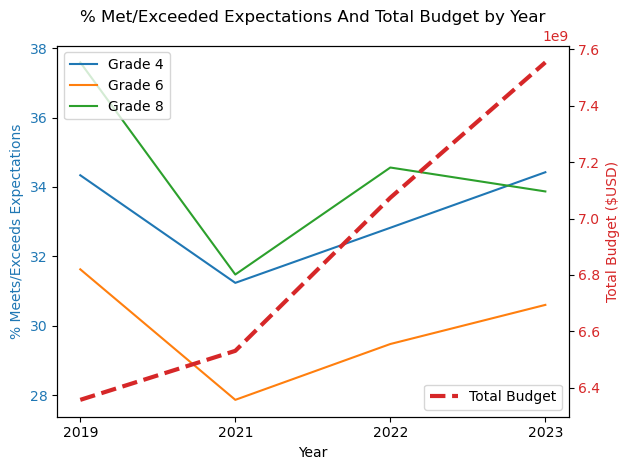

In [65]:
## Same plots as above by grade
# Generate the average meets/exceeds percentages
def getMeanMeetsOrExceeds(data, grades, years):
    meanMeetsOrExceeds = []
    for year in years:
        for grade in grades:
            # Don't remove 0.0 scores, because some schools actually did report values of 0
            meanMeetsOrExceeds.append(data[(data[year+' Grade '+grade+' meets or exceeds expectations'] != 'N/A')][year+' Grade '+grade+' meets or exceeds expectations'].mean())
    # Order is year, grade as in 2019 - 3, 2019-4, etc
    return meanMeetsOrExceeds

# Remove nans
meanMeetsOrExceeds = np.nan_to_num(np.array(getMeanMeetsOrExceeds(data, grades, years)))

meanMeetsOrExceedsAmended = meanMeetsOrExceeds[1::2]

## Get the spend per student
def getTotalBudget(data, years):
    totalBudget = []
    for year in years:
        totalBudget.append(data[(data[year+' Total Budget'] != 'N/A') & (data[year+' Total Budget'] != 0.0)][year+' Total Budget'].sum())
    # Order is year, spendPerStudent
    return totalBudget

def getPercentChange(data):
    change = []
    count = 0
    for val in data:
        if count == 0:
            change.append(0)
        else:
            change.append(round(((data[count] - data[count - 1])/data[count - 1])*100, 3))
        count += 1
    return change

totalBudget = getTotalBudget(data, years)
grade4 = meanMeetsOrExceedsAmended[0::3]
grade6 = meanMeetsOrExceedsAmended[1::3]
grade8 = meanMeetsOrExceedsAmended[2::3]
print('Grade 4 Percent Change: ', getPercentChange(grade4))
print('Grade 6 Percent Change: ', getPercentChange(grade6))
print('Grade 8 Percent Change: ', getPercentChange(grade8))
print('Total Budget Percent Change: ', getPercentChange(totalBudget))

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('% Meets/Exceeds Expectations', color=color)
ax1.plot(years, grade4, label="Grade 4")
ax1.plot(years, grade6, label="Grade 6")
ax1.plot(years, grade8, label="Grade 8")
ax1.legend(loc="upper left")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('% Met/Exceeded Expectations And Total Budget by Year')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Budget ($USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, getTotalBudget(data, years), color=color, label="Total Budget", linestyle='dashed', linewidth=3.0)
ax2.legend(loc="lower right")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Grade 4 Percent Change:  [0, -9.035, 5.086, 4.876]
Grade 6 Percent Change:  [0, -11.899, 5.777, 3.827]
Grade 8 Percent Change:  [0, -16.27, 9.8, -1.995]
Total Budget Percent Change:  [0, 1.262, 7.142, 5.503]


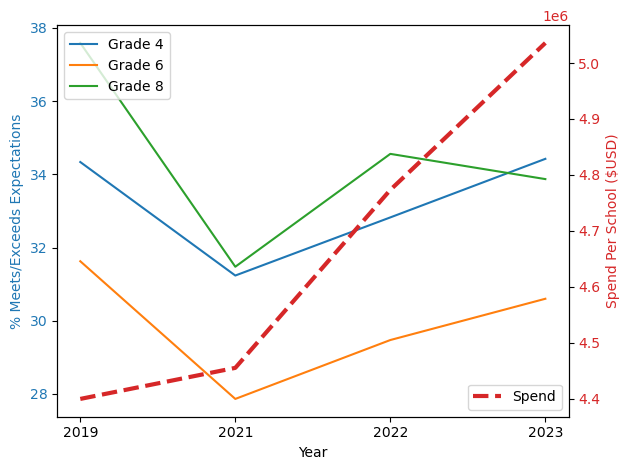

In [30]:
## Same plots as above by grade
# Generate the average meets/exceeds percentages
def getMeanMeetsOrExceeds(data, grades, years):
    meanMeetsOrExceeds = []
    for year in years:
        for grade in grades:
            # Don't remove 0.0 scores, because some schools actually did report values of 0
            meanMeetsOrExceeds.append(data[(data[year+' Grade '+grade+' meets or exceeds expectations'] != 'N/A')][year+' Grade '+grade+' meets or exceeds expectations'].mean())
    # Order is year, grade as in 2019 - 3, 2019-4, etc
    return meanMeetsOrExceeds

# Remove nans
meanMeetsOrExceeds = np.nan_to_num(np.array(getMeanMeetsOrExceeds(data, grades, years)))

meanMeetsOrExceedsAmended = meanMeetsOrExceeds[1::2]

## Get the spend per student
def getMeanSpendPerSchool(data, years):
    meanSpendPerSchool = []
    for year in years:
        meanSpendPerSchool.append(data[(data[year+' Total Budget'] != 'N/A') & (data[year+' Total Budget'] != 0.0)][year+' Total Budget'].mean())
    # Order is year, spendPerStudent
    return meanSpendPerSchool

fig, ax1 = plt.subplots()

print('Grade 4 Percent Change: ', getPercentChange(meanMeetsOrExceedsAmended[0::3]))
print('Grade 6 Percent Change: ', getPercentChange(meanMeetsOrExceedsAmended[1::3]))
print('Grade 8 Percent Change: ', getPercentChange(meanMeetsOrExceedsAmended[2::3]))
print('Total Budget Percent Change: ', getPercentChange(getMeanSpendPerSchool(data, years)))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('% Meets/Exceeds Expectations', color=color)
ax1.plot(years, meanMeetsOrExceedsAmended[0::3], label="Grade 4")
ax1.plot(years, meanMeetsOrExceedsAmended[1::3], label="Grade 6")
ax1.plot(years, meanMeetsOrExceedsAmended[2::3], label="Grade 8")
ax1.legend(loc="upper left")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Spend Per School ($USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, getMeanSpendPerSchool(data, years), color=color, label="Spend", linestyle='dashed', linewidth=3.0)
ax2.legend(loc="lower right")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Grade 4 Percent Change:  [0, -9.035, 5.086, 4.876]
Grade 6 Percent Change:  [0, -11.899, 5.777, 3.827]
Grade 8 Percent Change:  [0, -16.27, 9.8, -1.995]
Total Budget Percent Change:  [0, 9.766, 6.313, 9.902]


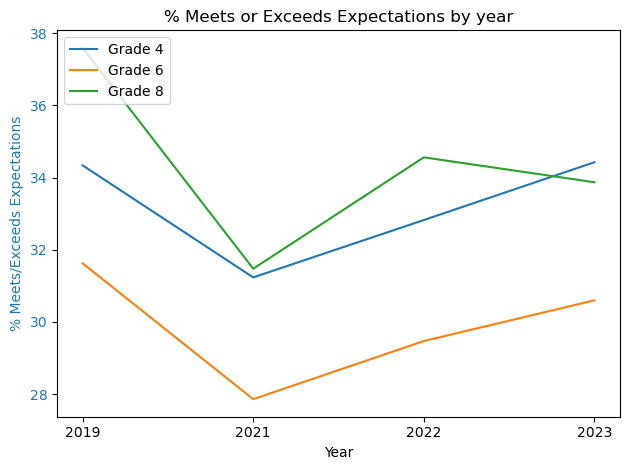

In [53]:
## Same plots as above by grade
# Generate the average meets/exceeds percentages
def getMeanMeetsOrExceeds(data, grades, years):
    meanMeetsOrExceeds = []
    for year in years:
        for grade in grades:
            # Don't remove 0.0 scores, because some schools actually did report values of 0
            meanMeetsOrExceeds.append(data[(data[year+' Grade '+grade+' meets or exceeds expectations'] != 'N/A')][year+' Grade '+grade+' meets or exceeds expectations'].mean())
    # Order is year, grade as in 2019 - 3, 2019-4, etc
    return meanMeetsOrExceeds

# Remove nans
meanMeetsOrExceeds = np.nan_to_num(np.array(getMeanMeetsOrExceeds(data, grades, years)))

meanMeetsOrExceedsAmended = meanMeetsOrExceeds[1::2]

## Get the spend per student
def getMeanSpendPerStudent(data, years):
    meanSpendPerStudent = []
    for year in years:
        meanSpendPerStudent.append(data[(data[year+' Spend Per Student'] != 'N/A') & (data[year+' Spend Per Student'] != 0.0)][year+' Spend Per Student'].mean())
    # Order is year, spendPerStudent
    return meanSpendPerStudent

print('Grade 4 Percent Change: ', getPercentChange(meanMeetsOrExceedsAmended[0::3]))
print('Grade 6 Percent Change: ', getPercentChange(meanMeetsOrExceedsAmended[1::3]))
print('Grade 8 Percent Change: ', getPercentChange(meanMeetsOrExceedsAmended[2::3]))
print('Total Budget Percent Change: ', getPercentChange(getMeanSpendPerStudent(data, years)))

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('% Meets/Exceeds Expectations', color=color)
ax1.plot(years, meanMeetsOrExceedsAmended[0::3], label="Grade 4")
ax1.plot(years, meanMeetsOrExceedsAmended[1::3], label="Grade 6")
ax1.plot(years, meanMeetsOrExceedsAmended[2::3], label="Grade 8")
ax1.legend(loc="upper left")
ax1.set_title('% Meets or Exceeds Expectations by year')
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('Spend Per Student ($USD)', color=color)  # we already handled the x-label with ax1
# ax2.plot(years, getMeanSpendPerStudent(data, years), color=color, label="Spend", linestyle='dashed', linewidth=3.0)
# ax2.legend(loc="lower right")
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

90435


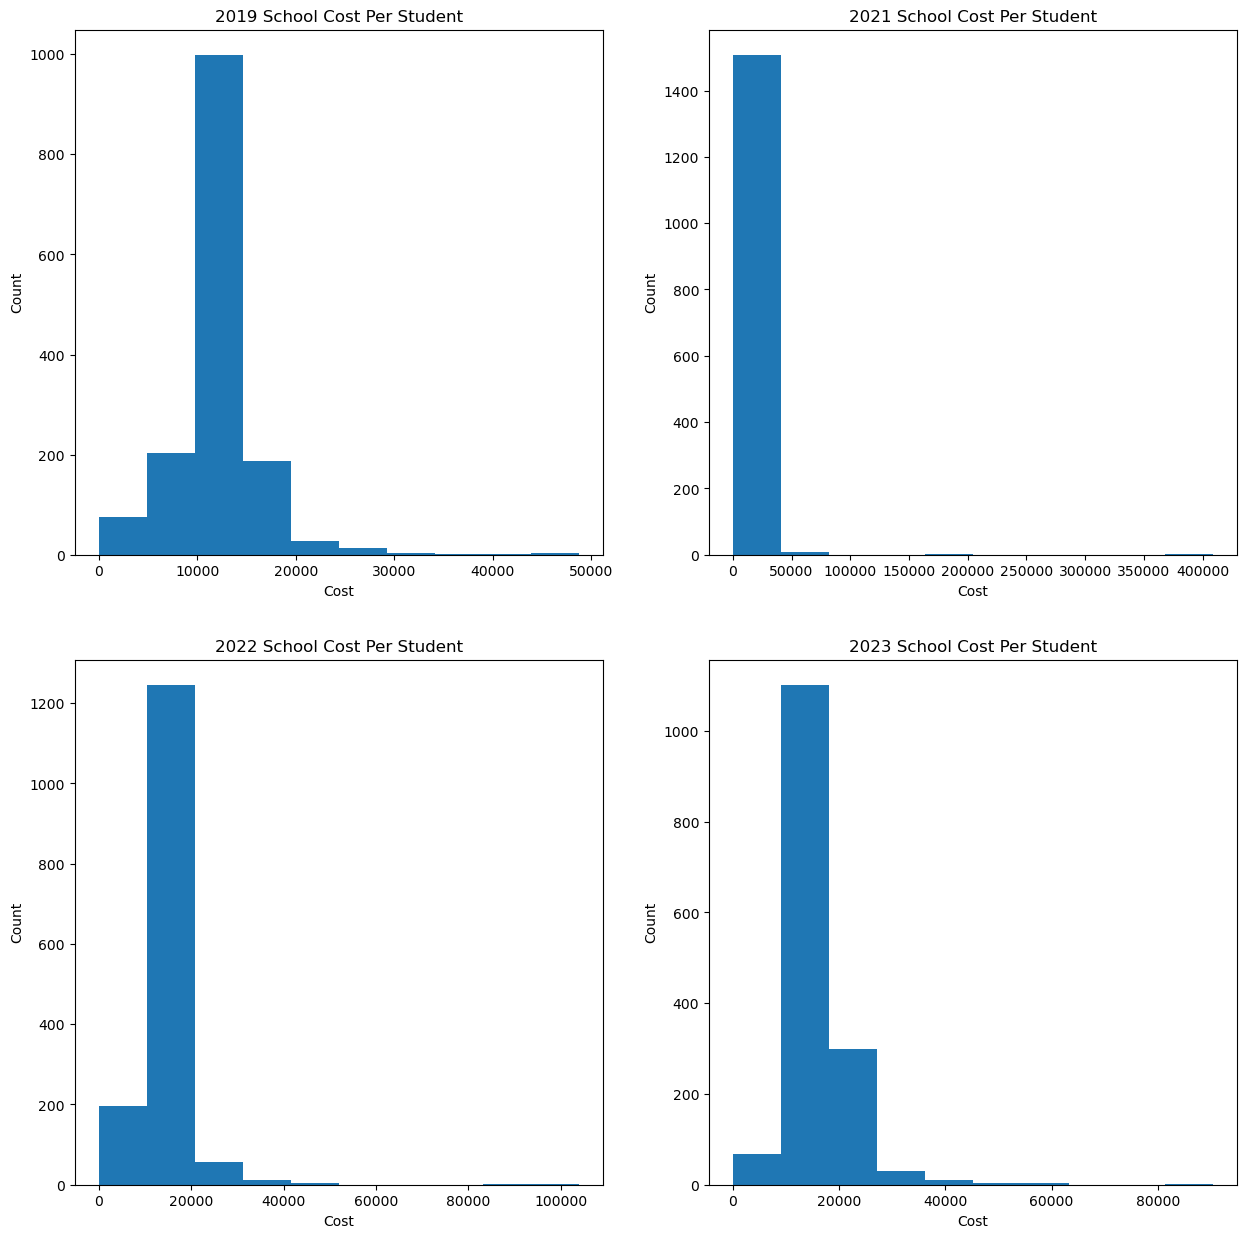

In [9]:
## Now some 10 bin plots
spendPerStudent_2019 = data['2019 Spend Per Student']
spendPerStudent_2021 = data['2021 Spend Per Student']
spendPerStudent_2022 = data['2022 Spend Per Student']
spendPerStudent_2023 = data['2023 Spend Per Student']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_figheight(15)
fig.set_figwidth(15)
      
ax1.hist(spendPerStudent_2019, bins=10)
ax1.set_xlabel('Cost')
ax1.set_ylabel('Count')
ax1.set_title('2019 School Cost Per Student')
      
ax2.hist(spendPerStudent_2021, bins=10)
ax2.set_xlabel('Cost')
ax2.set_ylabel('Count')
ax2.set_title('2021 School Cost Per Student')

ax3.hist(spendPerStudent_2022, bins=10)
ax3.set_xlabel('Cost')
ax3.set_ylabel('Count')
ax3.set_title('2022 School Cost Per Student')
      
ax4.hist(spendPerStudent_2023, bins=10)
ax4.set_xlabel('Cost')
ax4.set_ylabel('Count')
ax4.set_title('2023 School Cost Per Student')
print(spendPerStudent_2023.max())

In [10]:
## Could do an association analysis. Create a table of spends above average, gets above average score, and gets above average meets/exceeds expectations


2019 Grade 4 Contingency Table
            >= Avg SPS  < Avg SPS  Row Sum
>= Avg MSS         182        274      456
< Avg MSS          310        187      497
Col Sum            492        461      953
Mean Spend Per Student:  12087
Mean Mean Scale Score:  734
Lift Calculation:  0.7731
Correlation:  negative correlation
X^2 Calc:  48.0445
Support:  19.1 %
Confidence:  39.91 %

--------------------------------------------------------------
2019 Grade 6 Contingency Table
            >= Avg SPS  < Avg SPS  Row Sum
>= Avg MSS         119        135      254
< Avg MSS          149        132      281
Col Sum            268        267      535
Mean Spend Per Student:  11409
Mean Mean Scale Score:  733
Lift Calculation:  0.9353
Correlation:  negative correlation
X^2 Calc:  2.0345
Support:  22.24 %
Confidence:  46.85 %

--------------------------------------------------------------
2019 Grade 8 Contingency Table
            >= Avg SPS  < Avg SPS  Row Sum
>= Avg MSS          95        136     

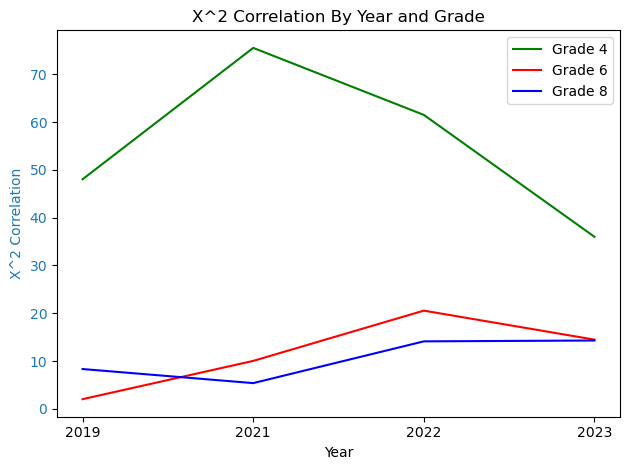

In [62]:
## Helper Functions
def calcX2Val(first, second):
    return ((first - second)**2) / second

def getX2Correlation(x2val, observedVal, expectedVal):
    if x2val > 1:
        if observedVal < expectedVal:
            return 'negative correlation'
        return 'positive correlation'
    return 'no correlation'

# List to store results in
x2_results = []
support_results = []
confidence_results = []
lift_results = []
below_avg = pd.DataFrame()
above_avg = pd.DataFrame()
## Calculate the lift, x2 and correlation for each grade by year
for year in years:
    for grade in ['4', '6', '8']:
        ## First, create a copy where all nans have been removed
        this_data = data[(data[year+' Grade '+grade+' Mean Scale Score'].notnull()) & (data[year+' Grade '+grade+' Mean Scale Score'] != 0.0)]
        if not this_data.empty:
            ## Get the average mean scale score
            mean_scale_score = this_data[year+' Grade '+grade+' Mean Scale Score'].mean()
            ## Get the average spend per student across all schools in 2023
            average_spend_per_student = this_data[year+' Spend Per Student'].mean()
            ## Get the contingency table values
            above_avg_mss_above_avg_sps = len(this_data[(this_data[year+' Grade '+grade+' Mean Scale Score'] >= mean_scale_score) & (this_data[year+' Spend Per Student'] >= average_spend_per_student)].values)
            above_avg_mss_below_avg_sps = len(this_data[(this_data[year+' Grade '+grade+' Mean Scale Score'] >= mean_scale_score) & (this_data[year+' Spend Per Student'] < average_spend_per_student)].values)
            below_avg_mss_above_avg_sps = len(this_data[(this_data[year+' Grade '+grade+' Mean Scale Score'] <  mean_scale_score) & (this_data[year+' Spend Per Student'] >= average_spend_per_student)].values)
            below_avg_mss_below_avg_sps = len(this_data[(this_data[year+' Grade '+grade+' Mean Scale Score'] <  mean_scale_score) & (this_data[year+' Spend Per Student'] < average_spend_per_student)].values)
            
            above_avg = this_data[(this_data[year+' Grade '+grade+' Mean Scale Score'] >= mean_scale_score) & (this_data[year+' Spend Per Student'] < average_spend_per_student)]
            below_avg = this_data[(this_data[year+' Grade '+grade+' Mean Scale Score'] <  mean_scale_score) & (this_data[year+' Spend Per Student'] >= average_spend_per_student)]
            
            
            row_sum_1 = above_avg_mss_above_avg_sps+above_avg_mss_below_avg_sps
            row_sum_2 = below_avg_mss_above_avg_sps+below_avg_mss_below_avg_sps
            col_sum_1 = above_avg_mss_above_avg_sps+below_avg_mss_above_avg_sps
            col_sum_2 = above_avg_mss_below_avg_sps+below_avg_mss_below_avg_sps
            total = row_sum_1 + row_sum_2
            
            ## Get the probabilities
            prob_above_mss_and_above_sps = above_avg_mss_above_avg_sps / total
            prob_above_avg_mss = row_sum_1 / total
            prob_above_avg_sps = col_sum_1 / total
            
            ## Calculate Lift
            lift = (prob_above_mss_and_above_sps)/(prob_above_avg_mss * prob_above_avg_sps)
            ## Calculate support
            support = prob_above_mss_and_above_sps
            ## Calculate confidence
            confidence = above_avg_mss_above_avg_sps / row_sum_1
            ## Calculate x2 value
            e_11 = row_sum_1 * col_sum_1 / total
            e_12 = row_sum_1 * col_sum_2 / total
            e_21 = row_sum_2 * col_sum_1 / total
            e_22 = row_sum_2 * col_sum_2 / total
            x_2 = calcX2Val(above_avg_mss_above_avg_sps, e_11) + calcX2Val(above_avg_mss_below_avg_sps, e_12) + calcX2Val(below_avg_mss_above_avg_sps, e_21) + calcX2Val(below_avg_mss_below_avg_sps, e_22)
            x2_results.append(x_2)
            support_results.append(support*100)
            confidence_results.append(confidence*100)
            lift_results.append(lift)
            ## Print out the table
            contingency_table = pd.DataFrame([
                [above_avg_mss_above_avg_sps, above_avg_mss_below_avg_sps, row_sum_1],
                [below_avg_mss_above_avg_sps, below_avg_mss_below_avg_sps, row_sum_2],
                [col_sum_1, col_sum_2, total],
            ],columns=['>= Avg SPS', '< Avg SPS', 'Row Sum'], index=['>= Avg MSS', '< Avg MSS', 'Col Sum'])
            print(year+' Grade '+grade+' Contingency Table')
            print(contingency_table)
            print('Mean Spend Per Student: ', round(average_spend_per_student))
            print('Mean Mean Scale Score: ', round(mean_scale_score))
            print('Lift Calculation: ',round(lift,4))
            print('Correlation: ', getX2Correlation(x_2, above_avg_mss_above_avg_sps, e_11))
            print('X^2 Calc: ', round(x_2,4))
            print('Support: ', round(support*100, 2), '%')
            print('Confidence: ', round(confidence*100, 2), '%')
            print('')
            print('--------------------------------------------------------------')
            
fig, ax1 = plt.subplots()
            
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('X^2 Correlation', color=color)
ax1.plot(years, x2_results[0::3], label="Grade 4", color='green')
ax1.plot(years, x2_results[1::3], label="Grade 6", color='red')
ax1.plot(years, x2_results[2::3], label="Grade 8", color='blue')
ax1.legend(loc="upper right")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('X^2 Correlation By Year and Grade')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 1.0, 'Meets/Exceeds Expectations % By Grade')

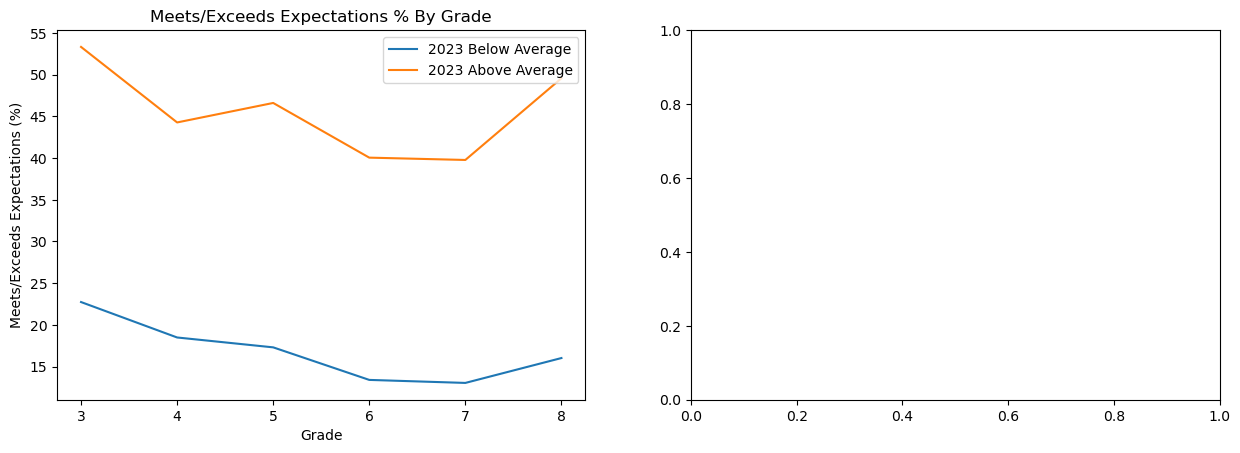

In [64]:
## Plot of Meets Expectations for above avg and below avg MSS
def getMeanMeetsOrExceeds(data, grades, years):
    meanMeetsOrExceeds = []
    for year in years:
        for grade in grades:
            # Don't remove 0.0 scores, because some schools actually did report values of 0
            meanMeetsOrExceeds.append(data[(data[year+' Grade '+grade+' meets or exceeds expectations'] != 'N/A')][year+' Grade '+grade+' meets or exceeds expectations'].mean())
    # Order is year, grade as in 2019 - 3, 2019-4, etc
    return meanMeetsOrExceeds

# Remove nans
meanMeetsOrExceedsBelow = np.nan_to_num(np.array(getMeanMeetsOrExceeds(below_avg, grades, years)))
meanMeetsOrExceedsAbove = np.nan_to_num(np.array(getMeanMeetsOrExceeds(above_avg, grades, years)))

fig, ((ax1, ax2)) = plt.subplots(1, 2)

fig.subplots_adjust(wspace=0.2, hspace=0)
fig.set_figwidth(15)

# Showing only 2019, 2022, and 2023
# ax1.plot(grades, meanMeetsOrExceedsBelow[0:6], label="2019")
# ax1.plot(grades, meanMeetsOrExceedsBelow[12:18], label="2022")
ax1.plot(grades, meanMeetsOrExceedsBelow[18:], label="2023 Below Average")
ax1.plot(grades, meanMeetsOrExceedsAbove[18:], label="2023 Above Average")
ax1.set_xlabel('Grade')
ax1.set_ylabel('Meets/Exceeds Expectations (%)')
ax1.legend(loc="upper right")
ax1.set_title('Meets/Exceeds Expectations % By Grade')

Text(0.5, 1.0, '2023 Grade 3 Mean Scale Score vs. Spend Per Student')

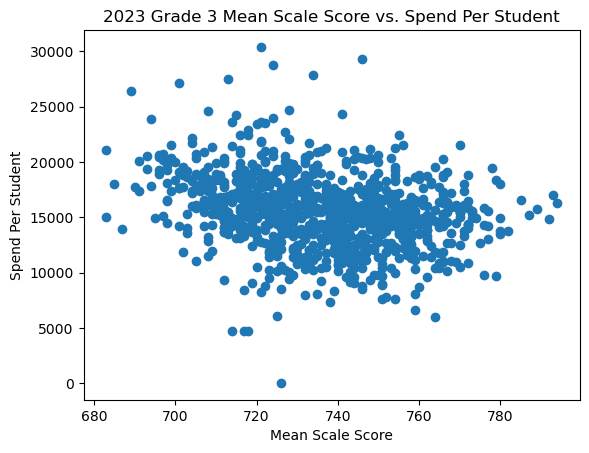

In [13]:
## Now let's generate a scatterplot, with spending on the x axis, and scores on the y-axis
scatterplot_2023 = data[(data['2023 Grade 3 Mean Scale Score'].notnull()) & (data['2023 Grade 3 Mean Scale Score'] != 0.0)]
plt.scatter(scatterplot_2023['2023 Grade 3 Mean Scale Score'], scatterplot_2023['2023 Spend Per Student'])
# plt.plot(Results_2023['School Code'], met_expect, label="% Met Expectations")
plt.xlabel('Mean Scale Score')
plt.ylabel('Spend Per Student')
plt.title('2023 Grade 3 Mean Scale Score vs. Spend Per Student')

Text(0.5, 1.0, '2023 Grade 8 Spend Per Student vs. % Meets or Exceeds Expectations')

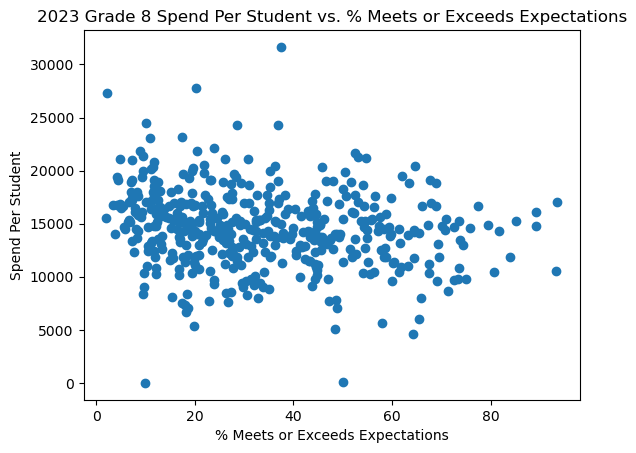

In [14]:
## Now let's generate a scatterplot, with spending on the x axis, and meets/exceeds on the y-axis
scatterplot_2023 = data[(data['2023 Grade 8 Mean Scale Score'].notnull()) & (data['2023 Grade 8 Mean Scale Score'] != 0.0)]
plt.scatter(scatterplot_2023['2023 Grade 8 meets or exceeds expectations'], scatterplot_2023['2023 Spend Per Student'])
# plt.plot(Results_2023['School Code'], met_expect, label="% Met Expectations")
plt.xlabel('% Meets or Exceeds Expectations')
plt.ylabel('Spend Per Student')
plt.title('2023 Grade 8 Spend Per Student vs. % Meets or Exceeds Expectations')

In [15]:
## Let's look at the 10 largest and 10 smallest cost per student
# largest_ten = data['2023 Spend Per Student'].nlargest(n=10)
# df[df['Ticket'] == 1].sort_values('Age')['Names'].head(10)
smallest_ten = data[(data['2023 Spend Per Student'].notnull()) & (data['2023 Spend Per Student'] != 0)].sort_values('2023 Spend Per Student').head(10)
largest_ten = data.sort_values('2023 Spend Per Student').tail(10)
top_bottom = pd.concat([largest_ten, smallest_ten])
top_bottom.to_csv('big_and_small.csv')
print(largest_ten['2023 Spend Per Student'])
print(top_bottom)

963     43773
116     43805
1148    45428
1147    48199
769     49089
265     53225
274     56481
526     59743
266     60635
953     90435
Name: 2023 Spend Per Student, dtype: int64
      Unnamed: 0   Level  District Code                 District Name  \
963        11877  SCHOOL           1420          Jefferson County R-1   
116         3887  SCHOOL            100                Alamosa RE-11J   
1148       13543  SCHOOL           1760            Kim Reorganized 88   
1147       13535  SCHOOL           1760            Kim Reorganized 88   
769        10077  SCHOOL           1020          Cheyenne Mountain 12   
265         5302  SCHOOL            230                    Walsh RE-1   
274         5371  SCHOOL            270                    Campo RE-6   
526         7784  SCHOOL            880               Denver County 1   
266         5310  SCHOOL            230                    Walsh RE-1   
953        11781  SCHOOL           1420          Jefferson County R-1   
301         56

In [16]:
## Now lets figure out what relationship spend has with score achievements

In [17]:
print(data['2023 Spend Per Student'].max())

90435


In [18]:
## Old stuff is below

In [19]:
## ___________________________________________________________________________

In [20]:
## Manual calc for mean grades
# Grade 3
Mean_Scale_Score_Avg_2023_Grade_3 = data[(data['2023 Grade 3 Mean Scale Score'] != 'N/A') & (data['2023 Grade 3 Mean Scale Score'] != 0.0)]['2023 Grade 3 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2022_Grade_3 = data[(data['2022 Grade 3 Mean Scale Score'] != 'N/A') & (data['2022 Grade 3 Mean Scale Score'] != 0.0)]['2022 Grade 3 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2021_Grade_3 = data[(data['2021 Grade 3 Mean Scale Score'] != 'N/A') & (data['2021 Grade 3 Mean Scale Score'] != 0.0)]['2021 Grade 3 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2019_Grade_3 = data[(data['2019 Grade 3 Mean Scale Score'] != 'N/A') & (data['2019 Grade 3 Mean Scale Score'] != 0.0)]['2019 Grade 3 Mean Scale Score'].mean()

# Grade 4
Mean_Scale_Score_Avg_2023_Grade_4 = data[(data['2023 Grade 4 Mean Scale Score'] != 'N/A') & (data['2023 Grade 4 Mean Scale Score'] != 0.0)]['2023 Grade 4 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2022_Grade_4 = data[(data['2022 Grade 4 Mean Scale Score'] != 'N/A') & (data['2022 Grade 4 Mean Scale Score'] != 0.0)]['2022 Grade 4 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2021_Grade_4 = data[(data['2021 Grade 4 Mean Scale Score'] != 'N/A') & (data['2021 Grade 4 Mean Scale Score'] != 0.0)]['2021 Grade 4 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2019_Grade_4 = data[(data['2019 Grade 4 Mean Scale Score'] != 'N/A') & (data['2019 Grade 4 Mean Scale Score'] != 0.0)]['2019 Grade 4 Mean Scale Score'].mean()

# Grade 5
Mean_Scale_Score_Avg_2023_Grade_5 = data[(data['2023 Grade 5 Mean Scale Score'] != 'N/A') & (data['2023 Grade 5 Mean Scale Score'] != 0.0)]['2023 Grade 5 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2022_Grade_5 = data[(data['2022 Grade 5 Mean Scale Score'] != 'N/A') & (data['2022 Grade 5 Mean Scale Score'] != 0.0)]['2022 Grade 5 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2021_Grade_5 = data[(data['2021 Grade 5 Mean Scale Score'] != 'N/A') & (data['2021 Grade 5 Mean Scale Score'] != 0.0)]['2021 Grade 5 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2019_Grade_5 = data[(data['2019 Grade 5 Mean Scale Score'] != 'N/A') & (data['2019 Grade 5 Mean Scale Score'] != 0.0)]['2019 Grade 5 Mean Scale Score'].mean()

# Grade 6
Mean_Scale_Score_Avg_2023_Grade_6 = data[(data['2023 Grade 6 Mean Scale Score'] != 'N/A') & (data['2023 Grade 6 Mean Scale Score'] != 0.0)]['2023 Grade 6 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2022_Grade_6 = data[(data['2022 Grade 6 Mean Scale Score'] != 'N/A') & (data['2022 Grade 6 Mean Scale Score'] != 0.0)]['2022 Grade 6 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2021_Grade_6 = data[(data['2021 Grade 6 Mean Scale Score'] != 'N/A') & (data['2021 Grade 6 Mean Scale Score'] != 0.0)]['2021 Grade 6 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2019_Grade_6 = data[(data['2019 Grade 6 Mean Scale Score'] != 'N/A') & (data['2019 Grade 6 Mean Scale Score'] != 0.0)]['2019 Grade 6 Mean Scale Score'].mean()

# Grade 7
Mean_Scale_Score_Avg_2023_Grade_7 = data[(data['2023 Grade 7 Mean Scale Score'] != 'N/A') & (data['2023 Grade 7 Mean Scale Score'] != 0.0)]['2023 Grade 7 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2022_Grade_7 = data[(data['2022 Grade 7 Mean Scale Score'] != 'N/A') & (data['2022 Grade 7 Mean Scale Score'] != 0.0)]['2022 Grade 7 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2021_Grade_7 = data[(data['2021 Grade 7 Mean Scale Score'] != 'N/A') & (data['2021 Grade 7 Mean Scale Score'] != 0.0)]['2021 Grade 7 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2019_Grade_7 = data[(data['2019 Grade 7 Mean Scale Score'] != 'N/A') & (data['2019 Grade 7 Mean Scale Score'] != 0.0)]['2019 Grade 7 Mean Scale Score'].mean()

# Grade 8
Mean_Scale_Score_Avg_2023_Grade_8 = data[(data['2023 Grade 8 Mean Scale Score'] != 'N/A') & (data['2023 Grade 8 Mean Scale Score'] != 0.0)]['2023 Grade 8 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2022_Grade_8 = data[(data['2022 Grade 8 Mean Scale Score'] != 'N/A') & (data['2022 Grade 8 Mean Scale Score'] != 0.0)]['2022 Grade 8 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2021_Grade_8 = data[(data['2021 Grade 8 Mean Scale Score'] != 'N/A') & (data['2021 Grade 8 Mean Scale Score'] != 0.0)]['2021 Grade 8 Mean Scale Score'].mean()
Mean_Scale_Score_Avg_2019_Grade_8 = data[(data['2019 Grade 8 Mean Scale Score'] != 'N/A') & (data['2019 Grade 8 Mean Scale Score'] != 0.0)]['2019 Grade 8 Mean Scale Score'].mean()

print('2023 Mean Scale Score Grade 3: ', Mean_Scale_Score_Avg_2023_Grade_3)
print('2022 Mean Scale Score Grade 3: ', Mean_Scale_Score_Avg_2022_Grade_3)
print('2021 Mean Scale Score Grade 3: ', Mean_Scale_Score_Avg_2021_Grade_3)
print('2019 Mean Scale Score Grade 3: ', Mean_Scale_Score_Avg_2019_Grade_3)
print('')
print('2023 Mean Scale Score Grade 4: ', Mean_Scale_Score_Avg_2023_Grade_4)
print('2022 Mean Scale Score Grade 4: ', Mean_Scale_Score_Avg_2022_Grade_4)
print('2021 Mean Scale Score Grade 4: ', Mean_Scale_Score_Avg_2021_Grade_4)
print('2019 Mean Scale Score Grade 4: ', Mean_Scale_Score_Avg_2019_Grade_4)
print('')
print('2023 Mean Scale Score Grade 5: ', Mean_Scale_Score_Avg_2023_Grade_5)
print('2022 Mean Scale Score Grade 5: ', Mean_Scale_Score_Avg_2022_Grade_5)
print('2021 Mean Scale Score Grade 5: ', Mean_Scale_Score_Avg_2021_Grade_5)
print('2019 Mean Scale Score Grade 5: ', Mean_Scale_Score_Avg_2019_Grade_5)
print('')
print('2023 Mean Scale Score Grade 6: ', Mean_Scale_Score_Avg_2023_Grade_6)
print('2022 Mean Scale Score Grade 6: ', Mean_Scale_Score_Avg_2022_Grade_6)
print('2021 Mean Scale Score Grade 6: ', Mean_Scale_Score_Avg_2021_Grade_6)
print('2019 Mean Scale Score Grade 6: ', Mean_Scale_Score_Avg_2019_Grade_6)
print('')
print('2023 Mean Scale Score Grade 7: ', Mean_Scale_Score_Avg_2023_Grade_7)
print('2022 Mean Scale Score Grade 7: ', Mean_Scale_Score_Avg_2022_Grade_7)
print('2021 Mean Scale Score Grade 7: ', Mean_Scale_Score_Avg_2021_Grade_7)
print('2019 Mean Scale Score Grade 7: ', Mean_Scale_Score_Avg_2019_Grade_7)
print('')
print('2023 Mean Scale Score Grade 8: ', Mean_Scale_Score_Avg_2023_Grade_8)
print('2022 Mean Scale Score Grade 8: ', Mean_Scale_Score_Avg_2022_Grade_8)
print('2021 Mean Scale Score Grade 8: ', Mean_Scale_Score_Avg_2021_Grade_8)
print('2019 Mean Scale Score Grade 8: ', Mean_Scale_Score_Avg_2019_Grade_8)
print('')

2023 Mean Scale Score Grade 3:  736.3792756539235
2022 Mean Scale Score Grade 3:  734.9178498985801
2021 Mean Scale Score Grade 3:  nan
2019 Mean Scale Score Grade 3:  738.9529288702929

2023 Mean Scale Score Grade 4:  731.5803842264914
2022 Mean Scale Score Grade 4:  730.2715163934427
2021 Mean Scale Score Grade 4:  727.356134636265
2019 Mean Scale Score Grade 4:  734.0398740818468

2023 Mean Scale Score Grade 5:  735.3577235772358
2022 Mean Scale Score Grade 5:  733.8584428715875
2021 Mean Scale Score Grade 5:  nan
2019 Mean Scale Score Grade 5:  736.6153050672182

2023 Mean Scale Score Grade 6:  728.6585788561525
2022 Mean Scale Score Grade 6:  727.854609929078
2021 Mean Scale Score Grade 6:  726.4885496183206
2019 Mean Scale Score Grade 6:  732.8635514018691

2023 Mean Scale Score Grade 7:  729.869481765835
2022 Mean Scale Score Grade 7:  729.5823754789272
2021 Mean Scale Score Grade 7:  nan
2019 Mean Scale Score Grade 7:  734.2598752598752

2023 Mean Scale Score Grade 8:  729.9810